In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Already use excel to delete duplicated product names, 
# null product prices, and remove $ marks
df = pd.read_csv("product_prices.csv")
df1 = df.dropna()
df1

,product_name,product_price
0,UpBright AUX in Cable Audio in Cord Compatible...,3.99
1,UPBRIGHT New USB PC Charging CABE Cord Lead fo...,3.99
2,"125 Bass Speaker Voice Coil, Speaker Coil Repl...",4.49
3,DGSUS (2PACK) 24 Pin USB 3.1 Type C Female Cha...,4.89
4,Bullet Ripple Speaker (2.1 x 1.5 x 2.1 inches)...,4.95
...,...,...
5386,Bang & Olufsen Beoplay A9 4th Gen Wireless Mul...,"5,250.00"
5387,Bang & Olufsen Beosound Balance Wireless Multi...,"5,250.00"
5388,Bang & Olufsen Beosound Balance Wireless Multi...,"5,500.00"
5389,Custom Pulsar Bluetooth Speaker - 500 PCS - $1...,"8,795.00"


# Clean Data

In [3]:
df1['y_value'] = 0
df1

,product_name,product_price,y_value
0,UpBright AUX in Cable Audio in Cord Compatible...,3.99,0
1,UPBRIGHT New USB PC Charging CABE Cord Lead fo...,3.99,0
2,"125 Bass Speaker Voice Coil, Speaker Coil Repl...",4.49,0
3,DGSUS (2PACK) 24 Pin USB 3.1 Type C Female Cha...,4.89,0
4,Bullet Ripple Speaker (2.1 x 1.5 x 2.1 inches)...,4.95,0
...,...,...,...
5386,Bang & Olufsen Beoplay A9 4th Gen Wireless Mul...,"5,250.00",0
5387,Bang & Olufsen Beosound Balance Wireless Multi...,"5,250.00",0
5388,Bang & Olufsen Beosound Balance Wireless Multi...,"5,500.00",0
5389,Custom Pulsar Bluetooth Speaker - 500 PCS - $1...,"8,795.00",0


In [4]:
# Rename the columns

print(df1.columns)
df2 = df1.rename(columns={'product_name': 'product_name',
                          ' product_price ': 'price',
                          'y_value': 'y_value'})
df2.head(3)

Index(['product_name', ' product_price ', 'y_value'], dtype='object')


,product_name,price,y_value
0,UpBright AUX in Cable Audio in Cord Compatible...,3.99,0
1,UPBRIGHT New USB PC Charging CABE Cord Lead fo...,3.99,0
2,"125 Bass Speaker Voice Coil, Speaker Coil Repl...",4.49,0


In [5]:
# Turn the type of prices into float

df2['price'] = df2['price'].replace({'\,': ''}, regex=True)
df2['price'] = df2['price'].astype(float)

# Remove Outliners

In [6]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df2.price))
df2['Zscore'] = z

for i in np.arange(1, 3.5, 0.5):
    
    x = i
    y = len(df2[df2.Zscore > i])
    z = "{:.2%}".format(len(df2[df2.Zscore > i]) / len(df2))

    print(x, y, z)
    
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

1.0 86 1.60%
1.5 42 0.78%
2.0 37 0.69%
2.5 29 0.54%
3.0 24 0.45%


In [7]:
df2[df2.Zscore > 1.5].head(3)

,product_name,price,y_value,Zscore
5349,Bose Home Speaker 500 with Alexa Voice Control...,548.00,0,1.616700
5350,EPOS Expand 80T,575.39,0,1.710587
5351,Bluesound Pulse 2 Wireless Multi-Room Smart Sp...,578.07,0,1.719774


In [8]:
# Drop product prices > 500
df3 = df2.loc[(df2['price'] <= 500)]
len(df3)

5349

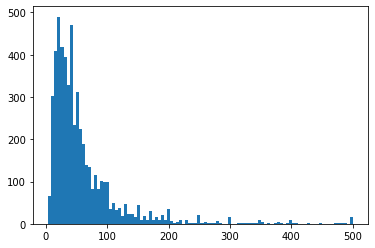

In [9]:
# Confirm the data distribution
plt.hist(df3['price'], bins=100);

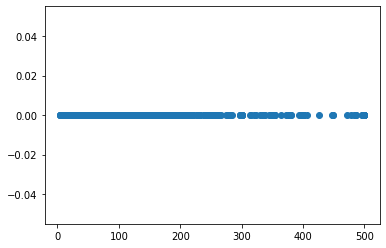

In [10]:
# Confirm the data distribution
df3['y_value'] = 0
plt.scatter(df3['price'], df3['y_value']);

# Elbow Method

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df3[['price','y_value']])
    sse.append(km.inertia_)

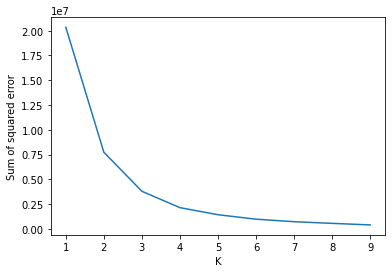

In [12]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

plt.savefig('kmeans',dpi=500)

# Clustering

In [13]:
# Clustering
km = KMeans(n_clusters=5)
x_predicted = km.fit_predict(df3[['y_value','price']])
df3['cluster'] = x_predicted

### Create data frames for five clusters

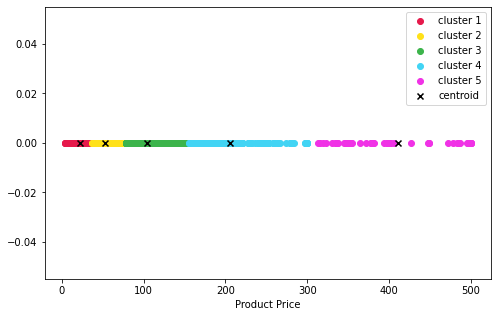

In [14]:
df_c1 = df3[df3.cluster==df3['cluster'].unique()[0]]
df_c2 = df3[df3.cluster==df3['cluster'].unique()[1]]
df_c3 = df3[df3.cluster==df3['cluster'].unique()[2]]
df_c4 = df3[df3.cluster==df3['cluster'].unique()[3]]
df_c5 = df3[df3.cluster==df3['cluster'].unique()[4]]

# Figure Size
plt.figure(figsize=(8,5))

# Plot five clusters
plt.scatter(df_c1['price'], df_c1['y_value'], c='#e6194B', label='cluster 1')
plt.scatter(df_c2['price'], df_c2['y_value'], c='#ffe119', label='cluster 2')
plt.scatter(df_c3['price'], df_c3['y_value'], c='#3cb44b', label='cluster 3')
plt.scatter(df_c4['price'], df_c4['y_value'], c='#42d4f4', label='cluster 4')
plt.scatter(df_c5['price'], df_c5['y_value'], c='#f032e6', label='cluster 5')

# Plot five centroids
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], c='black', marker='x',
            label='centroid')

# Add more information to the fiqure
plt.xlabel('Product Price')
plt.ylabel('')
plt.legend();

# Save the figure
plt.savefig('price clusters.png', dpi=500)

# Indentify Price Levels

In [15]:
# Create data frame

data = {'Cluster': [1, 2, 3, 4, 5],
                
        'Lowest Price': 
        [float(df_c1.price.min()), float(df_c2.price.min()), float(df_c3.price.min()),
        float(df_c4.price.min()), float(df_c5.price.min())],
                
        'Highest Price':
        [float(df_c1.price.max()), float(df_c2.price.max()), float(df_c3.price.max()),
        float(df_c4.price.max()), float(df_c5.price.max())],
                
        'Average Price':
        [round(float(df_c1.price.mean()), 2), round(float(df_c2.price.mean()), 2), 
        round(float(df_c3.price.mean()), 2), round(float(df_c4.price.mean()), 2), 
        round(float(df_c5.price.mean()), 2)],
        
        'Product Amount': 
        [f'{float(df_c1.price.count()):,g}', f'{float(df_c2.price.count()):,g}',
        f'{float(df_c3.price.count()):,g}', f'{float(df_c4.price.count()):,g}',
        f'{float(df_c5.price.count()):,g}']
               }

df_price_levels = pd.DataFrame(data, columns =
                               ['Cluster', 'Lowest Price', 
                                'Highest Price', 'Average Price', 
                                'Product Amount'])

df_price_levels

,Cluster,Lowest Price,Highest Price,Average Price,Product Amount
0,1,3.99,37.51,22.66,"2,350"
1,2,37.55,78.33,52.51,"1,842"
2,3,78.50,154.99,104.76,830
3,4,155.74,299.99,206.01,259
4,5,313.74,500.00,410.73,68


# Save to csv

In [16]:
df3.head()

,product_name,price,y_value,Zscore,cluster
0,UpBright AUX in Cable Audio in Cord Compatible...,3.99,0,0.248060,3
1,UPBRIGHT New USB PC Charging CABE Cord Lead fo...,3.99,0,0.248060,3
2,"125 Bass Speaker Voice Coil, Speaker Coil Repl...",4.49,0,0.246346,3
3,DGSUS (2PACK) 24 Pin USB 3.1 Type C Female Cha...,4.89,0,0.244975,3
4,Bullet Ripple Speaker (2.1 x 1.5 x 2.1 inches)...,4.95,0,0.244769,3


In [17]:
df3.to_csv('price_clusters.csv')